In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        file_names.append(os.path.join(dirname,filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
file_names

['/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_93.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_51.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_11.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_16.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_45.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_96.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_91.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_90.txt',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_2.tx

In [4]:
#now we remov the text file
refined_file_names=[]
for i in range(len(file_names)):
    if '.jpeg' in file_names[i]:
        refined_file_names.append(file_names[i])
        
        
print(len(refined_file_names))

177


In [5]:
refined_file_names.sort()

In [6]:
refined_file_names

['/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_1.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_10.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_11.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_12.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_13.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_14.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_15.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_16.jpeg',
 '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_17.

In [7]:
#now lets differentaite between the riped and the unriped tomatoes 
riped_tomatoes=[]
unriped_tomatoes=[]
for i in range(len(refined_file_names)):
    if "unriped_tomato" in refined_file_names[i]:
        unriped_tomatoes.append(refined_file_names[i])
    elif "riped_tomato" in refined_file_names[i]:
        riped_tomatoes.append(refined_file_names[i])

In [8]:
for i in range(len(unriped_tomatoes)):
    print(unriped_tomatoes[i])

/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_1.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_10.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_11.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_12.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_13.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_14.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_15.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_16.jpeg
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_17.jpeg
/kaggle/inp

In [9]:
import math
#now after getting the required riped and the unriped tomatoes , we now create our test and the train set
riped_train_path=[]
riped_test_path=[]
unriped_train_path=[]
unriped_test_path=[]
for i in range(len(riped_tomatoes)):
    if i<math.floor(0.8*len(riped_tomatoes)):
        riped_train_path.append(riped_tomatoes[i])
    else:
        riped_test_path.append(riped_tomatoes[i])
        
for i in range(len(unriped_tomatoes)):
    if i<math.floor(0.8*len(unriped_tomatoes)):
        unriped_train_path.append(unriped_tomatoes[i])
    else:
        unriped_test_path.append(unriped_tomatoes[i])
    

print(len(riped_train_path),len(riped_test_path))
print(len(unriped_train_path),len(unriped_test_path))

77 20
64 16


In [10]:
import matplotlib.pyplot as plt
import cv2
#here  we would create a function to standardize the image size 
def standardize_image(list1):
    resized_image_list=[]
    for i in range(len(list1)):
        z=cv2.imread(list1[i])
        resized_image=cv2.resize(z,(100,100))
        
        resized_image_list.append(resized_image)
        
    resized_image_list=np.asarray(resized_image_list)
    
    return resized_image_list
        
    
    

In [11]:
riped_train_image=standardize_image(riped_train_path)
riped_test_image=standardize_image(riped_test_path)
unriped_train_image=standardize_image(unriped_train_path)
unriped_test_image=standardize_image(unriped_test_path)

In [12]:
final_train_autoencoder=np.asarray(list(riped_train_image)+list(unriped_train_image))

In [13]:
print(final_train_autoencoder.shape)

(141, 100, 100, 3)


In [15]:
#now after getting the riped and the unriped tomatoes , we now create our autoencoder model , where the autoencoder model 
#will give the intermediate latent vector
#here we import the necessary dependencies 
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.layers import *
from keras.utils import plot_model
from tensorflow.keras.models import Model 


In [16]:
#now lets create the autoencoder model 
#the basic idea is i would first train the autoencoder to give the restored output , and then from that latent vector
#another model is trained which would help in classification 
#now first lets create the autoencoder model 
input1=Input((100,100,3))
#now we first we flatten the latter

#this is the encoder layer 
flatten1=Flatten()(input1)
dense_1=Dense(1024,activation='relu')(flatten1)
batch_normalization=BatchNormalization()(dense_1)
dense_2=Dense(1000,activation='relu')(batch_normalization)
dropout=Dropout(0.2)(dense_2)
batch_normalization1=BatchNormalization()(dropout)
dense_3=Dense(512,activation='relu')(batch_normalization1)
dropout1=Dropout(0.3)(dense_3)
dense_5=Dense(256,activation='relu')(dropout1)
dense_6=Dense(128,activation='relu')(dense_5)
dense_7=Dense(100,activation='relu')(dense_6)
dense_8=Dense(64,activation='relu')(dense_7)
dense_9=Dense(32,activation='relu')(dense_8)
dense_10=Dense(16,activation='relu')(dense_9)  #here we will create the latent vector dimension is 16


In [17]:
#now lets create the decoder model 

dense_11=Dense(32,activation='relu')(dense_10)
dense_12=Dense(64,activation='relu')(dense_11)
dense_13=Dense(128,activation='relu')(dense_12)
dense_14=Dense(256,activation='relu')(dense_13)
dense_15=Dense(512,activation='relu')(dense_14)
dense_16=Dense(1024,activation='relu')(dense_15)
dense_17=Dense(2500,activation='relu')(dense_16)
reshaped_image=Reshape(target_shape=(50,50,1))(dense_17)

#now first we upsample the image 
upsampled_image=Conv2DTranspose(filters=1,kernel_size=(3,3),strides=(2,2),padding='same')(reshaped_image)
upsampled_final_image=Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='same')(upsampled_image)


autoencoder_model=Model(inputs=input1,outputs=upsampled_final_image)

In [18]:
autoencoder_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,025,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2500)           │     2,562,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 50, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 100, 100, 1)    │            1

 Total params: 35,716,264 (136.25 MB)

 Trainable params: 35,712,216 (136.23 MB)

 Non-trainable params: 4,048 (15.81 KB)

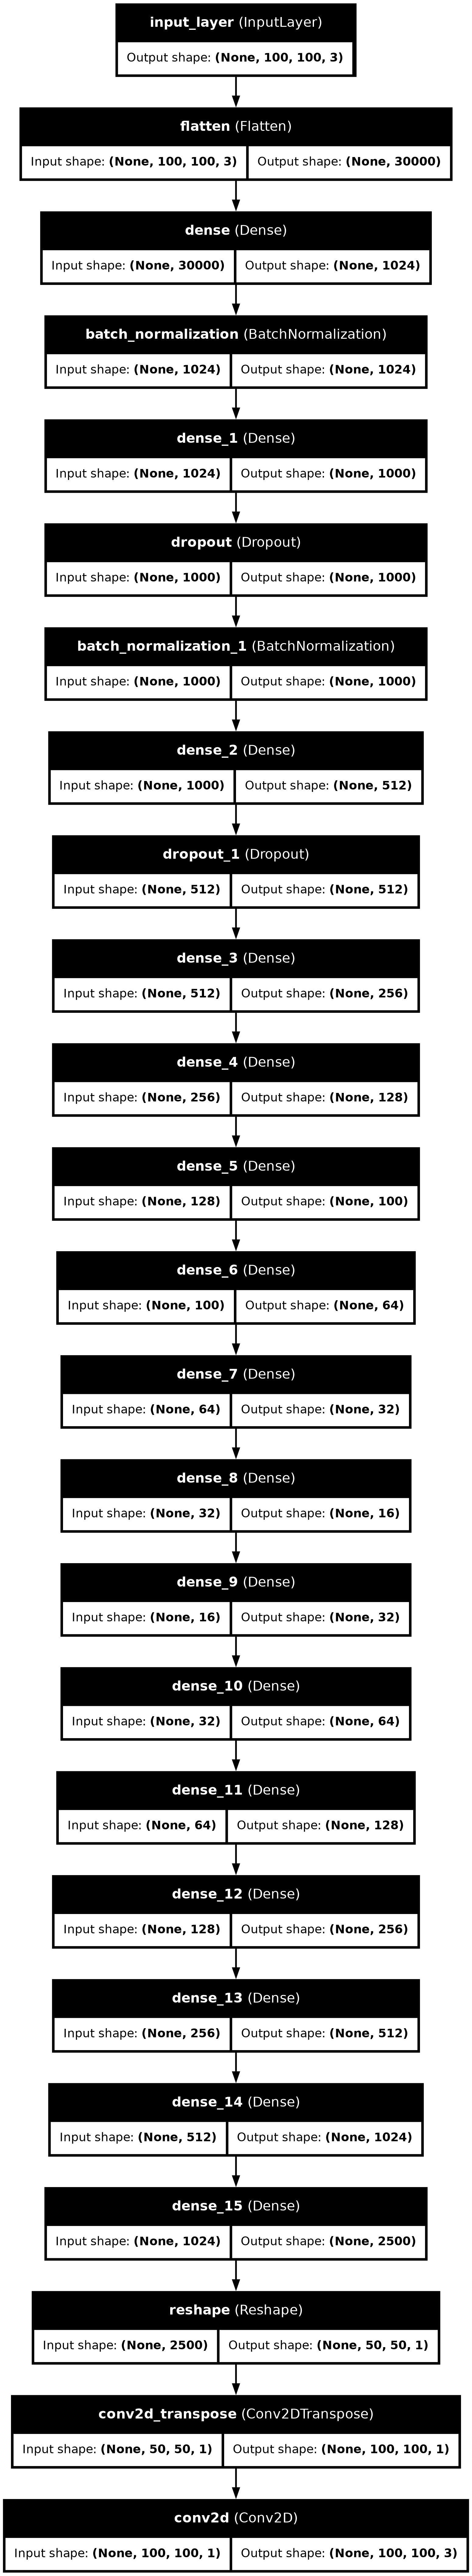

In [19]:
plot_model(autoencoder_model,show_layer_names=True,show_shapes=True)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

autoencoder_model.compile(
    loss=MeanSquaredError(),
    metrics=['accuracy'],
    optimizer=Adam(learning_rate=0.001),run_eagerly=True
)

In [ ]:
#since we were persistently getting the resource 

In [21]:
# Assuming `final_train_autoencoder` is your training data
autoencoder_model.fit(
    final_train_autoencoder,
    final_train_autoencoder,
    verbose=1,
    epochs=10,
    batch_size=2
)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.2302 - loss: 26392.9883
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.2629 - loss: 24505.9668
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.4257 - loss: 24472.8848
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.4238 - loss: 23497.6504
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.4370 - loss: 20202.9980
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.4098 - loss: 21179.6602
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.4686 - loss: 19216.9316
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.4497 - loss: 19638.2656
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.4288 - loss: 21609.7559
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.4350 - loss: 19683.5469


In [22]:
#we now lets save the model 
autoencoder_model.save('autoencoder_model.h5')



In [23]:
#now after saving the model , we now would take create another model ,that takes in the image , the latent vector is given
#and then from that latent vector we classify the sample 
#now lets create the submodel 
#first we load the model 
from tensorflow.keras.models import load_model
autoencoder_model1=load_model('autoencoder_model.h5')


In [24]:
#now after loading the model lets create the submodel 
#now we want to get the output from the latent vector
encoder_output=autoencoder_model1.get_layer('dense_8').output

#now lets create the model 
autoencoder_submodel=Model(inputs=autoencoder_model1.input,outputs=encoder_output)
autoencoder_submodel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,025,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,452,828 (123.80 MB)

 Trainable params: 32,448,780 (123.78 MB)

 Non-trainable params: 4,048 (15.81 KB)

In [26]:
#so we get the latent vector representation 
#so now we would create another model , which would take in the input 100x100x3 into the latent vector which is then given
#to the model , for classification_model
#so here e create the sequential model 
from tensorflow.keras.models import Sequential
# Define the classification model using the encoder model
classification_model = Sequential()

classification_model.add(Input((100,100,3)))
# Add the encoder model to the sequential model (ensure it has a defined input shape)
classification_model.add(autoencoder_submodel)

# Add classification layers
classification_model.add(Dense(32, activation='relu'))
classification_model.add(Dense(64, activation='relu'))
classification_model.add(BatchNormalization())
classification_model.add(Dense(128, activation='relu'))
classification_model.add(Dropout(0.2))
classification_model.add(Dense(256, activation='relu'))
classification_model.add(Dense(64, activation='relu'))
classification_model.add(Dense(16, activation='relu'))
classification_model.add(Dense(2, activation='softmax'))

# Print the summary of the classification model
classification_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ (None, 16)             │    32,452,828 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,514,606 (124.03 MB)

 Trainable params: 32,510,430 (124.02 MB)

 Non-trainable params: 4,176 (16.31 KB)

In [27]:
#now lets change our train and the test set 
x_test=[]
y_test=[]
for i in range(len(riped_test_image)):
    y_test.append([1,0])
    x_test.append(riped_test_image[i])
    
for i in range(len(unriped_test_image)):
    y_test.append([0,1])
    x_test.append(unriped_test_image[i])
    
    
x_train=[]
y_train=[]
for i in range(len(riped_train_image)):
    y_train.append([1,0])
    x_train.append(riped_train_image[i])
    
for i in range(len(unriped_train_image)):
    y_train.append([0,1])
    x_train.append(unriped_train_image[i])
    


In [28]:
#now after typecasting them into the numpy array 
x_test=np.asarray(x_test)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [29]:
#now first lets compile the model 
from tensorflow.keras.losses import MeanSquaredError
classification_model.compile(loss=MeanSquaredError(),
                             optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
                             metrics=['accuracy'],run_eagerly=True)




In [32]:
#now lets fit the data to the model 
history=classification_model.fit(x_train,y_train,epochs=10,batch_size=5,verbose=2)

Epoch 1/10
29/29 - 6s - 208ms/step - accuracy: 0.9149 - loss: 0.0721
Epoch 2/10
29/29 - 6s - 213ms/step - accuracy: 0.8652 - loss: 0.1114
Epoch 3/10
29/29 - 6s - 212ms/step - accuracy: 0.8652 - loss: 0.1220
Epoch 4/10
29/29 - 6s - 209ms/step - accuracy: 0.8014 - loss: 0.1457
Epoch 5/10
29/29 - 6s - 211ms/step - accuracy: 0.8865 - loss: 0.0949
Epoch 6/10
29/29 - 6s - 210ms/step - accuracy: 0.8582 - loss: 0.1021
Epoch 7/10
29/29 - 6s - 214ms/step - accuracy: 0.8723 - loss: 0.0926
Epoch 8/10
29/29 - 6s - 211ms/step - accuracy: 0.8794 - loss: 0.0867
Epoch 9/10
29/29 - 6s - 209ms/step - accuracy: 0.8582 - loss: 0.1161
Epoch 10/10
29/29 - 6s - 211ms/step - accuracy: 0.8511 - loss: 0.1104


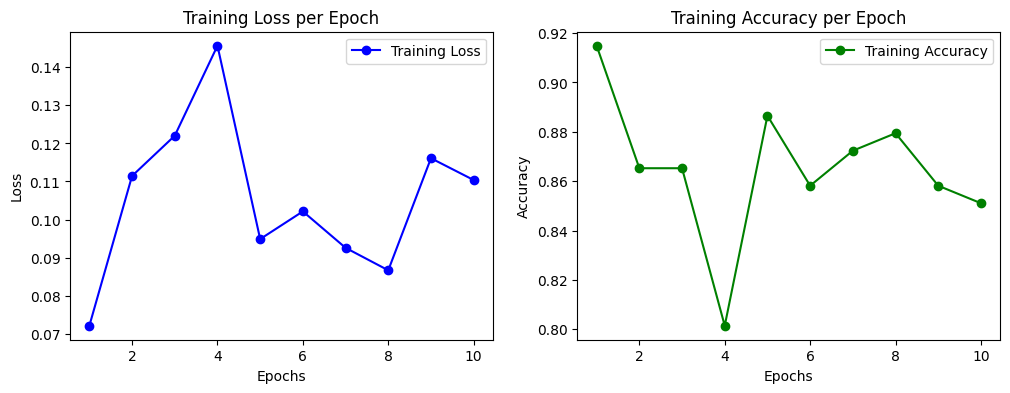

In [38]:
#now lets plot the accuracy and the loss of the model 
accuracy=history.history['accuracy']
loss=history.history['loss']

epochs=range(1,len(loss)+1)
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go-', label='Training Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()